## 수학과 파이썬 복습

#### 벡터와 행렬

In [1]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__)
print(x.shape)
print(x.ndim)

W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


#### 행렬의 원소별 연산

In [2]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

print(W + X)
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


#### 브로드캐스트

In [3]:
A = np.array([[1,2], [3,4]])
print(A * 10)

[[10 20]
 [30 40]]


In [4]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
print(A*b)

[[10 40]
 [30 80]]


#### 벡터의 내적과 행렬의 곱

In [5]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))

# 행렬의 곱
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.matmul(A, B))

32
[[19 22]
 [43 50]]


## 신경망의 추론

#### 신경망 추론 전체 그림

In [6]:
import numpy as np
W1 = np.random.randn(2, 4)  # 가중치
b1 = np.random.randn(4)     # 편향
x = np.random.randn(10, 2)  # 입력
h = np.matmul(x, W1) + b1

In [7]:
# 시그모이드
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [8]:
a = sigmoid(h)
print(a)

[[0.4193589  0.73394954 0.36966595 0.74871493]
 [0.43299928 0.78074654 0.18378164 0.7521003 ]
 [0.40318798 0.58877078 0.20926896 0.7582916 ]
 [0.42564317 0.84774369 0.90592868 0.72670144]
 [0.48110854 0.95657268 0.58917116 0.72659053]
 [0.42340696 0.75458354 0.34558854 0.7484497 ]
 [0.33077349 0.14580501 0.54234667 0.76633507]
 [0.40757629 0.66230195 0.41125828 0.75042266]
 [0.41398239 0.83392099 0.97653364 0.71874364]
 [0.39169093 0.60652576 0.75443484 0.74391402]]


In [9]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

print(s)

[[-2.45957923 -1.43906982  0.46278453]
 [-2.20522422 -1.00606027  0.52651489]
 [-3.63599362 -2.75130652  0.58787041]
 [-1.66821494 -1.00089841  0.27910238]
 [-3.18011232 -2.2091424   0.51840878]
 [-3.36216826 -1.86715218  0.76889112]
 [-2.36813756 -1.80670554  0.44705326]
 [-1.81082837 -0.52904886  0.53442729]
 [-3.25386882 -1.58070253  0.8176998 ]
 [-1.97994145 -0.93296662  0.43221713]]


#### 계층으로 클래스화 및 순전파 구현

In [10]:
import numpy as np

class Sigmoid:
  def __init__(self):
    self.params = []

  def forward(self, x):
    return 1 / (1 + np.exp(-x))

In [11]:
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    return out

In [12]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)

    # 계층 생성
    self.layers = [
                   Affine(W1, b1),
                   Sigmoid(),
                   Affine(W2, b2)
    ]

    # 모든 가중치를 리스트에 모은다.
    self.params = []
    for layer in self.layers:
      self.params += layer.params

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

In [13]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)

[[ 3.51944596 -0.77886928 -2.29572734]
 [ 2.921021   -0.94100696 -2.15130748]
 [ 2.79771613 -0.97396641 -2.01272227]
 [ 3.16038091 -0.81383748 -2.41751392]
 [ 2.91765883 -1.02794218 -1.94414287]
 [ 2.87919181 -1.03794678 -1.88038261]
 [ 1.87754393 -0.71867395 -1.69626779]
 [ 2.09586506 -0.84884159 -1.74169288]
 [ 1.51724624 -0.58331699 -0.95142694]
 [ 2.99529726 -1.11120224 -1.89740419]]


## 신경망의 학습

In [14]:
# repeat 노드
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)       # 입력
y = np.repeat(x, N, axis = 0)   # 순전파
dy = np.random.randn(N, D)      # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims = True)    # 역전파

In [15]:
# sum 노드
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)                 # 입력
y = np.sum(x, axis = 0, keepdims = True)  # 순전파

dy = np.random.randn(1, D)                # 무작위 기울기
dx = np.repeat(dy, N, axis = 0)           # 역전파

In [16]:
# 노드 역전파
class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None

  def forward(self, x):
    W, = self.params
    out = np.matmul(x, W)
    self.x = x
    return out

  def backward(self, dout):
    W, = self.params
    dx = np.matmul(dout, W.T)
    dw = np.matmul(self.x.T, dout)
    self.grads[0][...] = dW
    return dx

#### 기울기 도출과 역전파 구현

In [17]:
# Sigmoid 계층
class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

In [18]:
# Affine 계층
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None

  def forward(self, x):
    W, b = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    db = np.sum(dout, axis = 0)

    self.grads[0][...] = dW
    self.grads[1][...] = db
    return dx

#### 가중치 갱신

In [19]:
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr

  def update(self, params, grads):
    for i in range(len(params)):
      params[i] -= self.lr * grads[i]

## 신경망으로 문제를 풀다

In [20]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝2

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝2


#### 스파이럴 데이터셋

In [21]:
import sys
sys.path.append('..')     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()
print('x', x.shape)       # (300, 2)
print('t', t.shape)       # (300, 3)

x (300, 2)
t (300, 3)


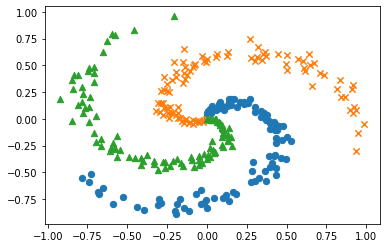

In [22]:
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

#### 신경망 구현

In [23]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I, H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H, O)
    b2 = np.zeros(O)

    # 계층 생성
    self.layers = [
                   Affine(W1, b1),
                   Sigmoid(),
                   Affine(W2, b2)
    ]
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss

  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

#### 학습용 코드

In [24]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from ch01.two_layer_net import TwoLayerNet

# 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters * batch_size: (iters + 1) * batch_size]
    batch_t = t[iters * batch_size: (iters + 1) * batch_size]

    # 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    # 정기적으로 학습 경과 출력
    if (iters + 1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print(f'| 에폭 {epoch + 1} | 반복 {iters + 1} | 손실 {avg_loss}')
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

| 에폭 1 | 반복 10 | 손실 1.1256062166823237
| 에폭 2 | 반복 10 | 손실 1.1255202354489933
| 에폭 3 | 반복 10 | 손실 1.1162613752115285
| 에폭 4 | 반복 10 | 손실 1.1162867078413503
| 에폭 5 | 반복 10 | 손실 1.1123000112951948
| 에폭 6 | 반복 10 | 손실 1.1384639824108038
| 에폭 7 | 반복 10 | 손실 1.1590961883070312
| 에폭 8 | 반복 10 | 손실 1.1086316143023154
| 에폭 9 | 반복 10 | 손실 1.1173305676924539
| 에폭 10 | 반복 10 | 손실 1.1287957712269248
| 에폭 11 | 반복 10 | 손실 1.1168438089353867
| 에폭 12 | 반복 10 | 손실 1.108338779101816
| 에폭 13 | 반복 10 | 손실 1.0876149200499459
| 에폭 14 | 반복 10 | 손실 1.0766813865819347
| 에폭 15 | 반복 10 | 손실 1.0442376735950383
| 에폭 16 | 반복 10 | 손실 1.034578262633777
| 에폭 17 | 반복 10 | 손실 0.9572932039643971
| 에폭 18 | 반복 10 | 손실 0.9183853210879448
| 에폭 19 | 반복 10 | 손실 0.9241491096212101
| 에폭 20 | 반복 10 | 손실 0.8685139076509195
| 에폭 21 | 반복 10 | 손실 0.8493807047841541
| 에폭 22 | 반복 10 | 손실 0.8171629191788113
| 에폭 23 | 반복 10 | 손실 0.7924414711357767
| 에폭 24 | 반복 10 | 손실 0.7826646392986113
| 에폭 25 | 반복 10 | 손실 0.8235432039035638
| 에폭 26 | 반

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

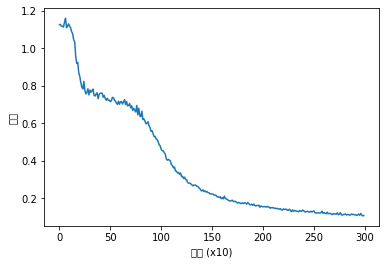

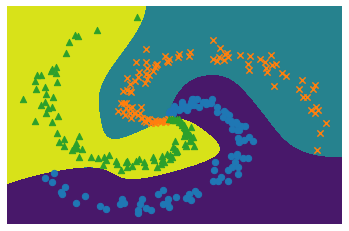

In [26]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

#### Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

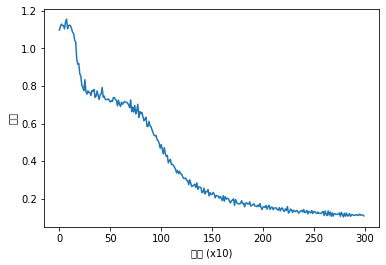

In [30]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size= 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x ,t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

## 계산 고속화

#### 비트 정밀도

In [31]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [32]:
b = np.random.randn(3).astype(np.float32)
print(b.dtype)
c = np.random.randn(3).astype('f')
print(c.dtype)

float32
float32


#### GPU(쿠파이)

In [ ]:
# cupy 설치 오류
import cupy as cp

x = cp.arange(6).reshape(2, 3).astype('f')
print(x)
print(x.sum(axis = 1))

## 정리

- 신경망은 입력층, 은닉층(중간층), 출력층을 지닌다.
- 완전연결계층에 의해 선형 변환이 이뤄지고, 활성화 함수에 의해 비선형 변환이 이뤄진다.
- 완전 연결계층이나 미니배치 처리는 행렬로 모아 한꺼번에 계산할 수 있다.
- 오차 역전파법을 사용하영 신경망의 손실에 관한 기울기를 효율적으로 구할 수 있다.
- 신경망이 수행하는 처리는 계산 그래프로 시각화 할 수 있으며, 순전파와 역전파를 이해하는 데 도움이 된다.
- 신경망의 구성요소들을 '계층'으로 모듈화해두면, 이를 조립하여 신경망을 쉽게 구성할 수 있다.
- 신경망 고속화에는 GPU를 이용한 병렬 계산과 데이터의 비트 정밀도가 중요하다.